In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
import numpy as np

In [2]:
data_2014_2016 = pd.read_csv('./datasets/2014_2016_simple.csv')
data_2017 = pd.read_csv('./datasets/2017_simple.csv')
data_2018 = pd.read_csv('./datasets/2018_simple.csv')
data_2019 = pd.read_csv('./datasets/2019_simple.csv')
holidays = pd.read_csv('./datasets/holidays.csv')

In [3]:
data = pd.DataFrame()
all_data = pd.concat([data_2014_2016, data_2017, data_2018], ignore_index = True, sort=False)
all_data.drop('Unnamed: 0', axis=1, inplace=True)

data['ds'] = pd.to_datetime(all_data['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
data['y'] = all_data['peak_load']

In [5]:
m = Prophet(holidays=holidays)
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=80)
future.tail()

,ds
1901,2019-03-17
1902,2019-03-18
1903,2019-03-19
1904,2019-03-20
1905,2019-03-21


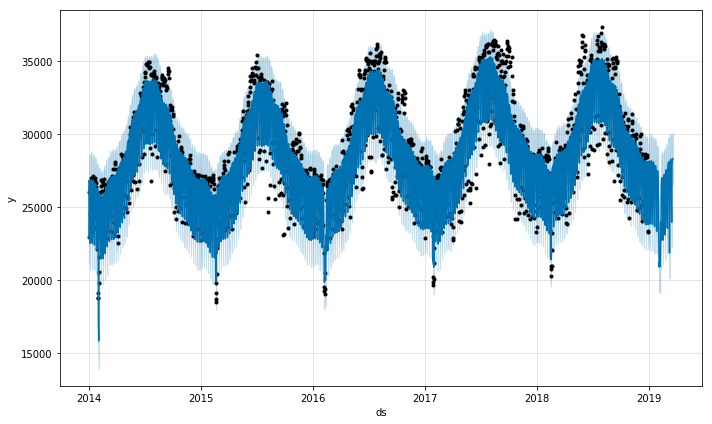

In [7]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

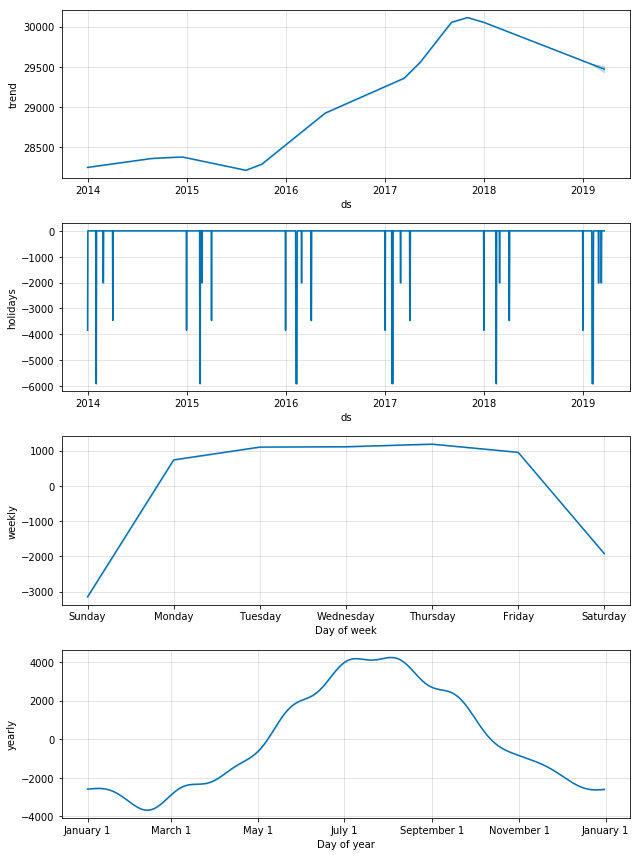

In [8]:
fig2 = m.plot_components(forecast)

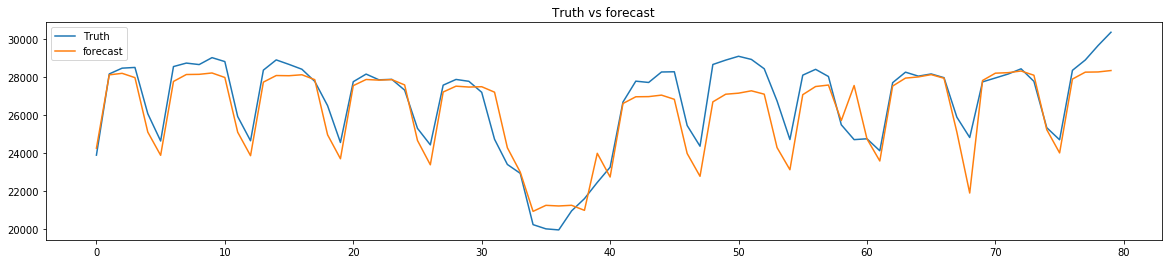

In [9]:
#test = forecast['yhat'].tail(31) + 1500

plt.figure(figsize=(20,4))
x_axis = range(0, 80)
plt.plot(x_axis, data_2019.head(80)['peak_load'], '-')
plt.plot(x_axis, forecast['yhat'].tail(80), '-')
plt.title('Truth vs forecast')
plt.legend(['Truth', 'forecast'])
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_predicted, y_actual):
    return sqrt(mean_squared_error(y_actual, y_predicted))
    

In [11]:
rmse(forecast['yhat'].tail(80), data_2019.head(80)['peak_load'])

1041.7073414164927

In [12]:
m.train_holiday_names

0    chinese_new_year
1            new_year
2       tomb_sweeping
3           228_peace
dtype: object